In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Xây dựng mô hình hồi quy tuyến tính**

Xử dụng tập dữ liệu giá nhà đất - HousePrice.csv

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/tranlybuu/BaiTap/main/2022/HousePrice.csv')
df = df.drop(['Address','Price'],axis=1)
df.head(5)

,Area,Room,Parking,Warehouse,Elevator,Price(USD)
0,63,1,True,True,True,61666.67
1,60,1,True,True,True,61666.67
2,79,2,True,True,True,18333.33
3,95,2,True,True,True,30083.33
4,123,2,True,True,True,233333.33


Mô tả dữ liệu

In [4]:
print("Kích thước của tập dữ liệu:",df.shape)

Kích thước của tập dữ liệu: (3479, 6)


In [5]:
df.info()
# Kiểm tra cho thấy không có hàng dữ liệu nào bị thiếu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(1), object(1)
memory usage: 91.9+ KB


In [6]:
df.describe()

,Room,Price(USD)
count,3479.000000,3.479000e+03
mean,2.079908,1.786341e+05
std,0.758275,2.699978e+05
min,0.000000,1.200000e+02
25%,2.000000,4.727500e+04
50%,2.000000,9.666667e+04
75%,2.000000,2.000000e+05
max,5.000000,3.080000e+06


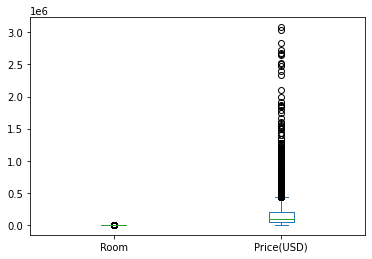

In [7]:
df.plot(kind='box', layout=(1,4),)
plt.show()

Chia tập dữ liệu train và test

In [8]:
from sklearn import preprocessing
# Tách cột giá nhà và chuyển hóa các giá trị True/False thành 1/0
df = df[df.columns[:]].apply(preprocessing.LabelEncoder().fit_transform)
output = df['Price(USD)']
input = df.drop(['Price(USD)'],axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.3, random_state=0)

Huấn luyện mô hình với tập dữ liệu train

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Kiểm thử mô  hình với tập dữ liệu test

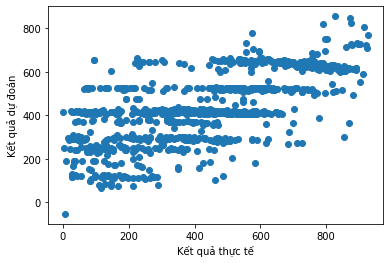

In [11]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Kết quả thực tế")
plt.ylabel("Kết quả dự đoán")
plt.show()

In [12]:
from sklearn.metrics import r2_score
print("Accuracy:",model.score(X_test, y_test))
print('r2:',r2_score(y_test, y_pred))

Accuracy: 0.46601206447086774
r2: 0.46601206447086774
